###### Import libraries for :
1. connecting python to PostgreSQL database
2. data visualization
3. creating a pdf file for all the figures

In [1]:
import psycopg2 as pg2

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib.backends.backend_pdf import PdfPages

###### Establish a connection to the PostgreSQL database

In [4]:
conn = pg2.connect(database='Data_Analyst_Portfolio',user='postgres',password='ilovesql')

In [5]:
cur = conn.cursor()

###### Create font dictionaries for use in bar charts

In [6]:
font1 = {'family':'serif','color':'darkblue','size':40}
font2 = {'family':'serif','color':'darkblue','size':35}

### FICTION GENRE

###### Use SQL queries for analysing and fetching data from the database

In [7]:
cur.execute ('''
            select book_name,
            max(reviews)
            from amazonbooks
            where genre = 'Fiction' and user_rating = (select max(user_rating)
                             from amazonbooks)
            group by book_name 
            order by 
            max(reviews) desc
            ''')

In [8]:
fic_bar = cur.fetchall()

###### Create two separate lists from the above result to plot a bar chart

In [9]:
Name1 = []
Review1 = []

for i in fic_bar:
    Name1.append(i[0])
    Review1.append(i[1])

Name1.reverse()
Review1.reverse()

###### Use a horizontal bar chart to avoid overlapping of x-axis tick labels as is the case with a vertical bar graph with long x-axis tick labels

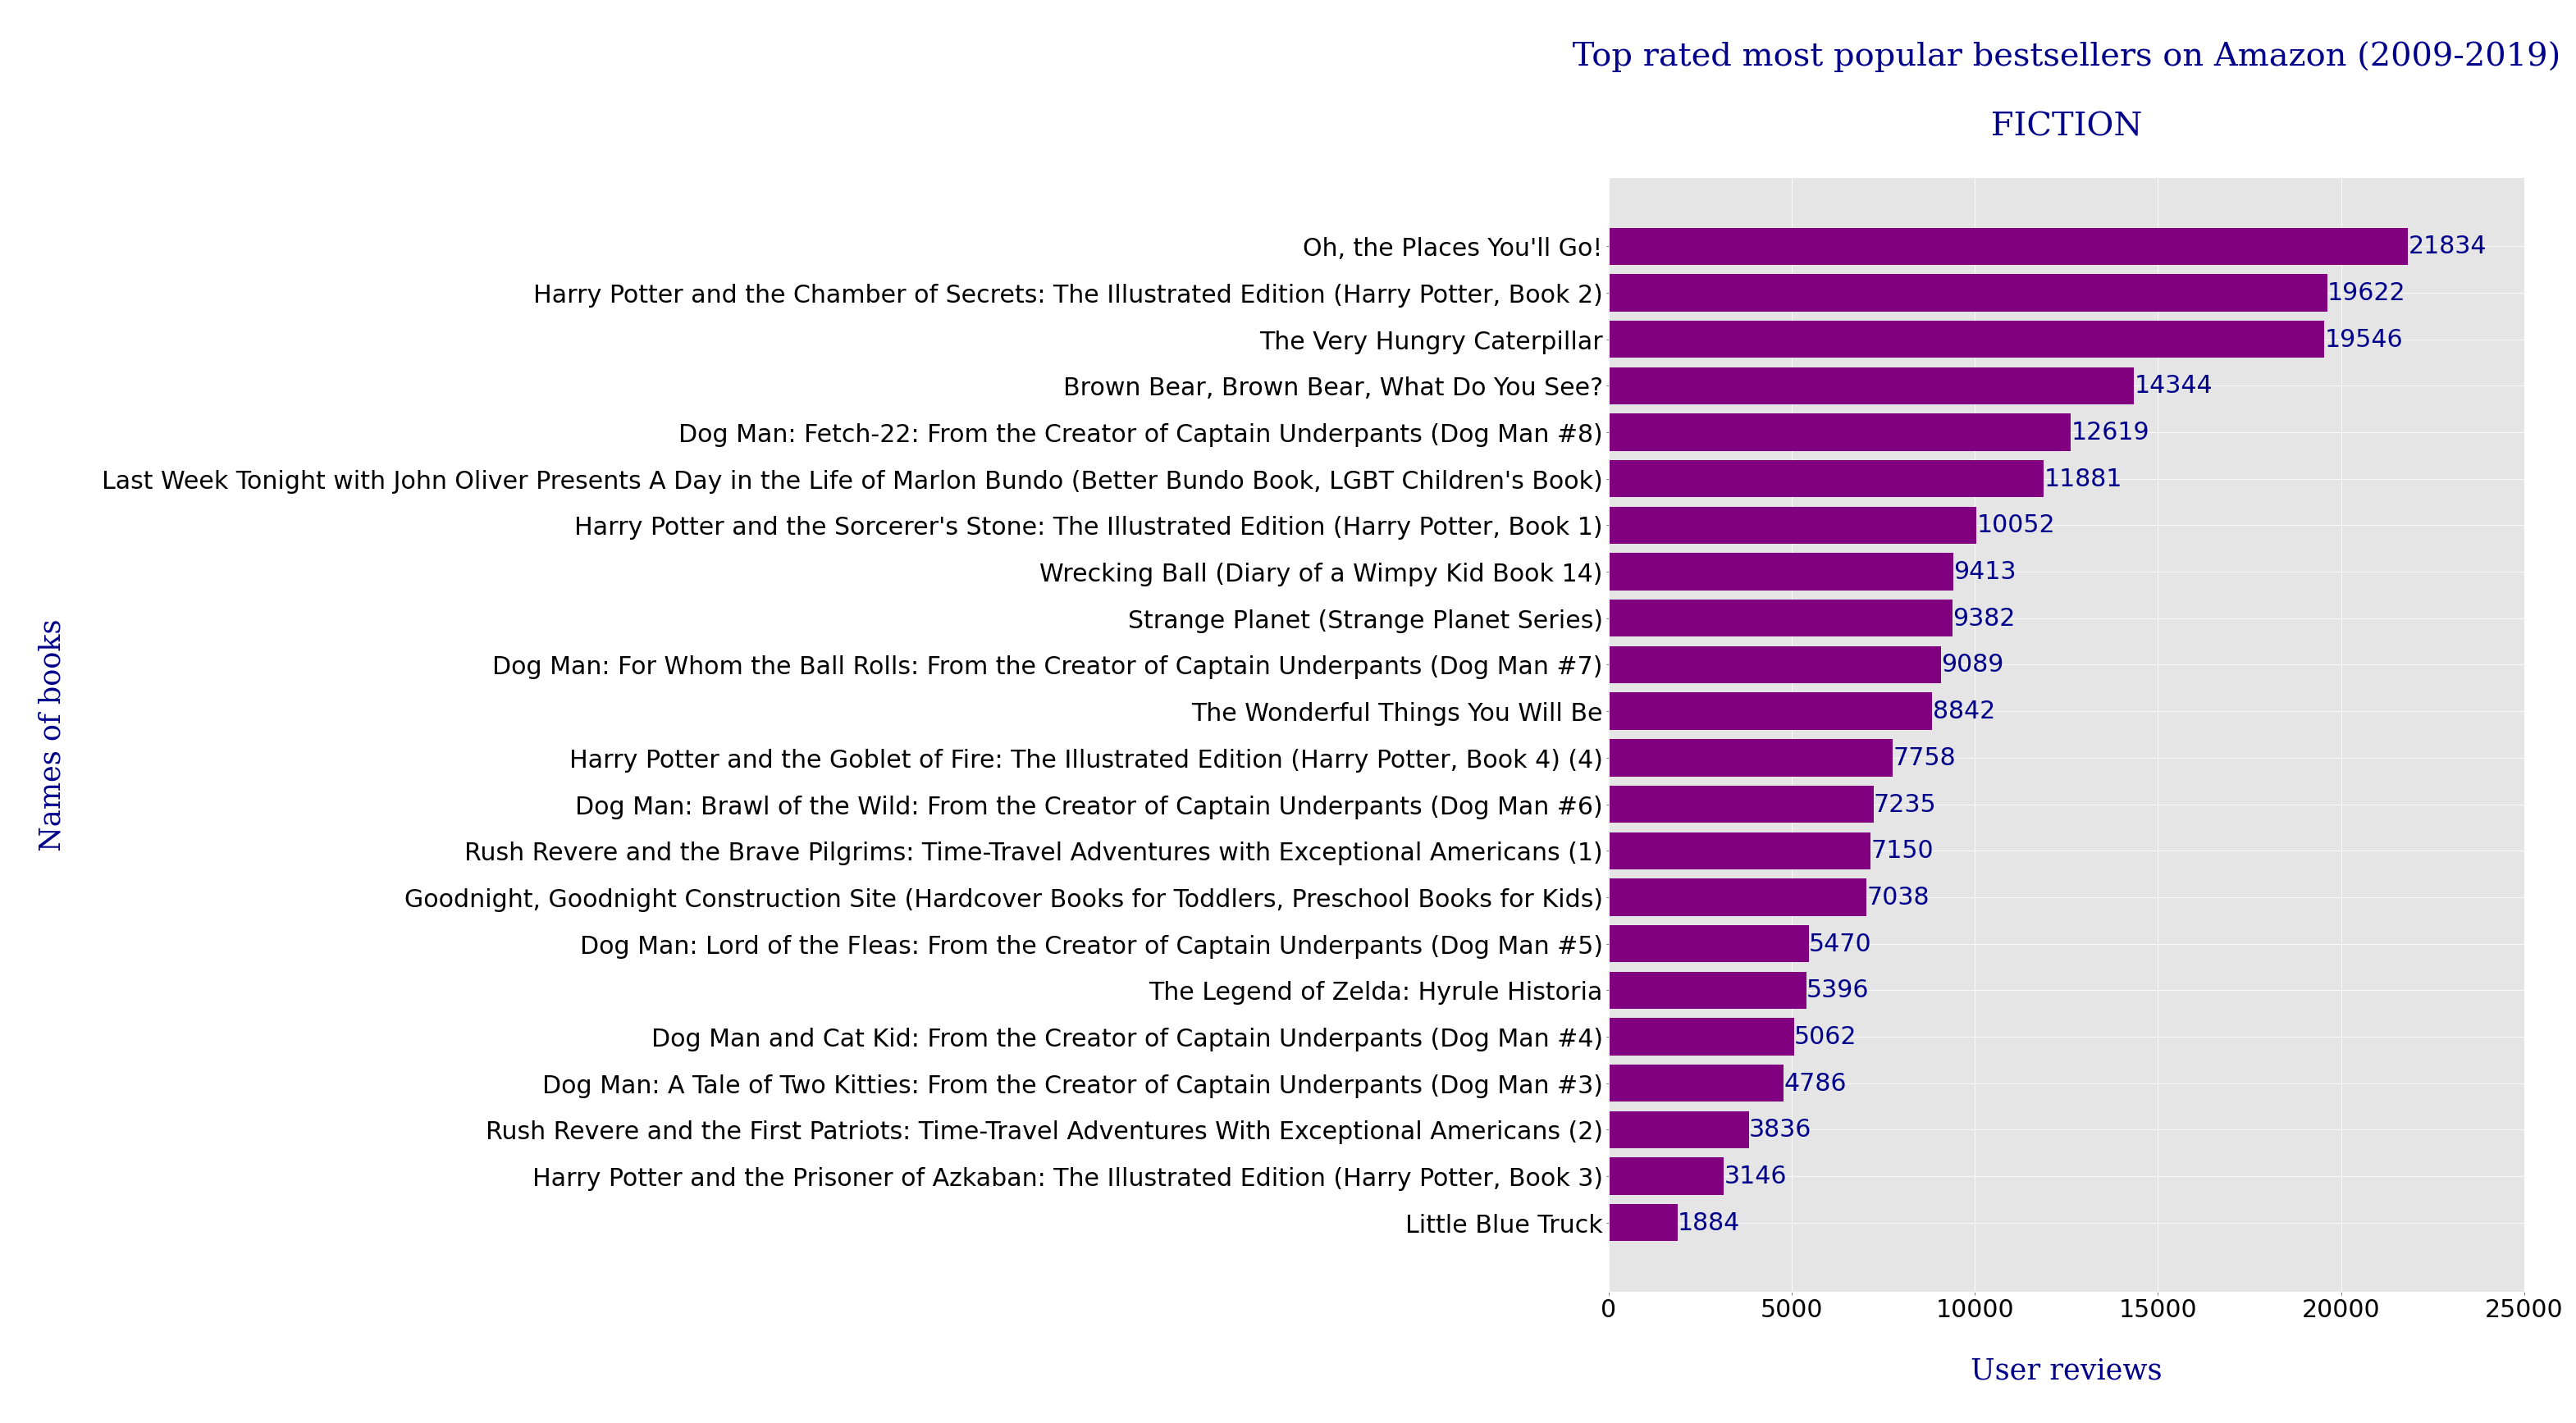

In [10]:
fig1 = plt.figure(figsize=(20,25))
plt.style.use('ggplot')

plt.barh(Name1, Review1, color='purple')
plt.xlim(0,25000)
plt.ylabel('\n Names of books \n', fontdict=font2)
plt.xlabel('\n User reviews \n', fontdict=font2)
plt.title('\n Top rated most popular bestsellers on Amazon (2009-2019) \n\n FICTION \n',  fontdict=font1)

plt.xticks(fontsize=30, color='black')
plt.yticks(fontsize=30, color='black')

#Show bar values
for i, v in enumerate(Review1):
    plt.text(v+3, i-0.15, str(v), color='darkblue',fontsize=30)

plt.show()

###### Create a table to show more details of the above FICTION bestsellers

In [11]:
cur.execute('''
            select book_name, author, price_in_$, year from
(select book_name, author, price_in_$, year, max(reviews)
from amazonbooks
where genre = 'Fiction' and user_rating = (select max(user_rating)
                              from amazonbooks)
group by book_name, author, price_in_$, year
order by 
max(reviews) desc) as fic_table
''')

In [12]:
fic_table = cur.fetchall()

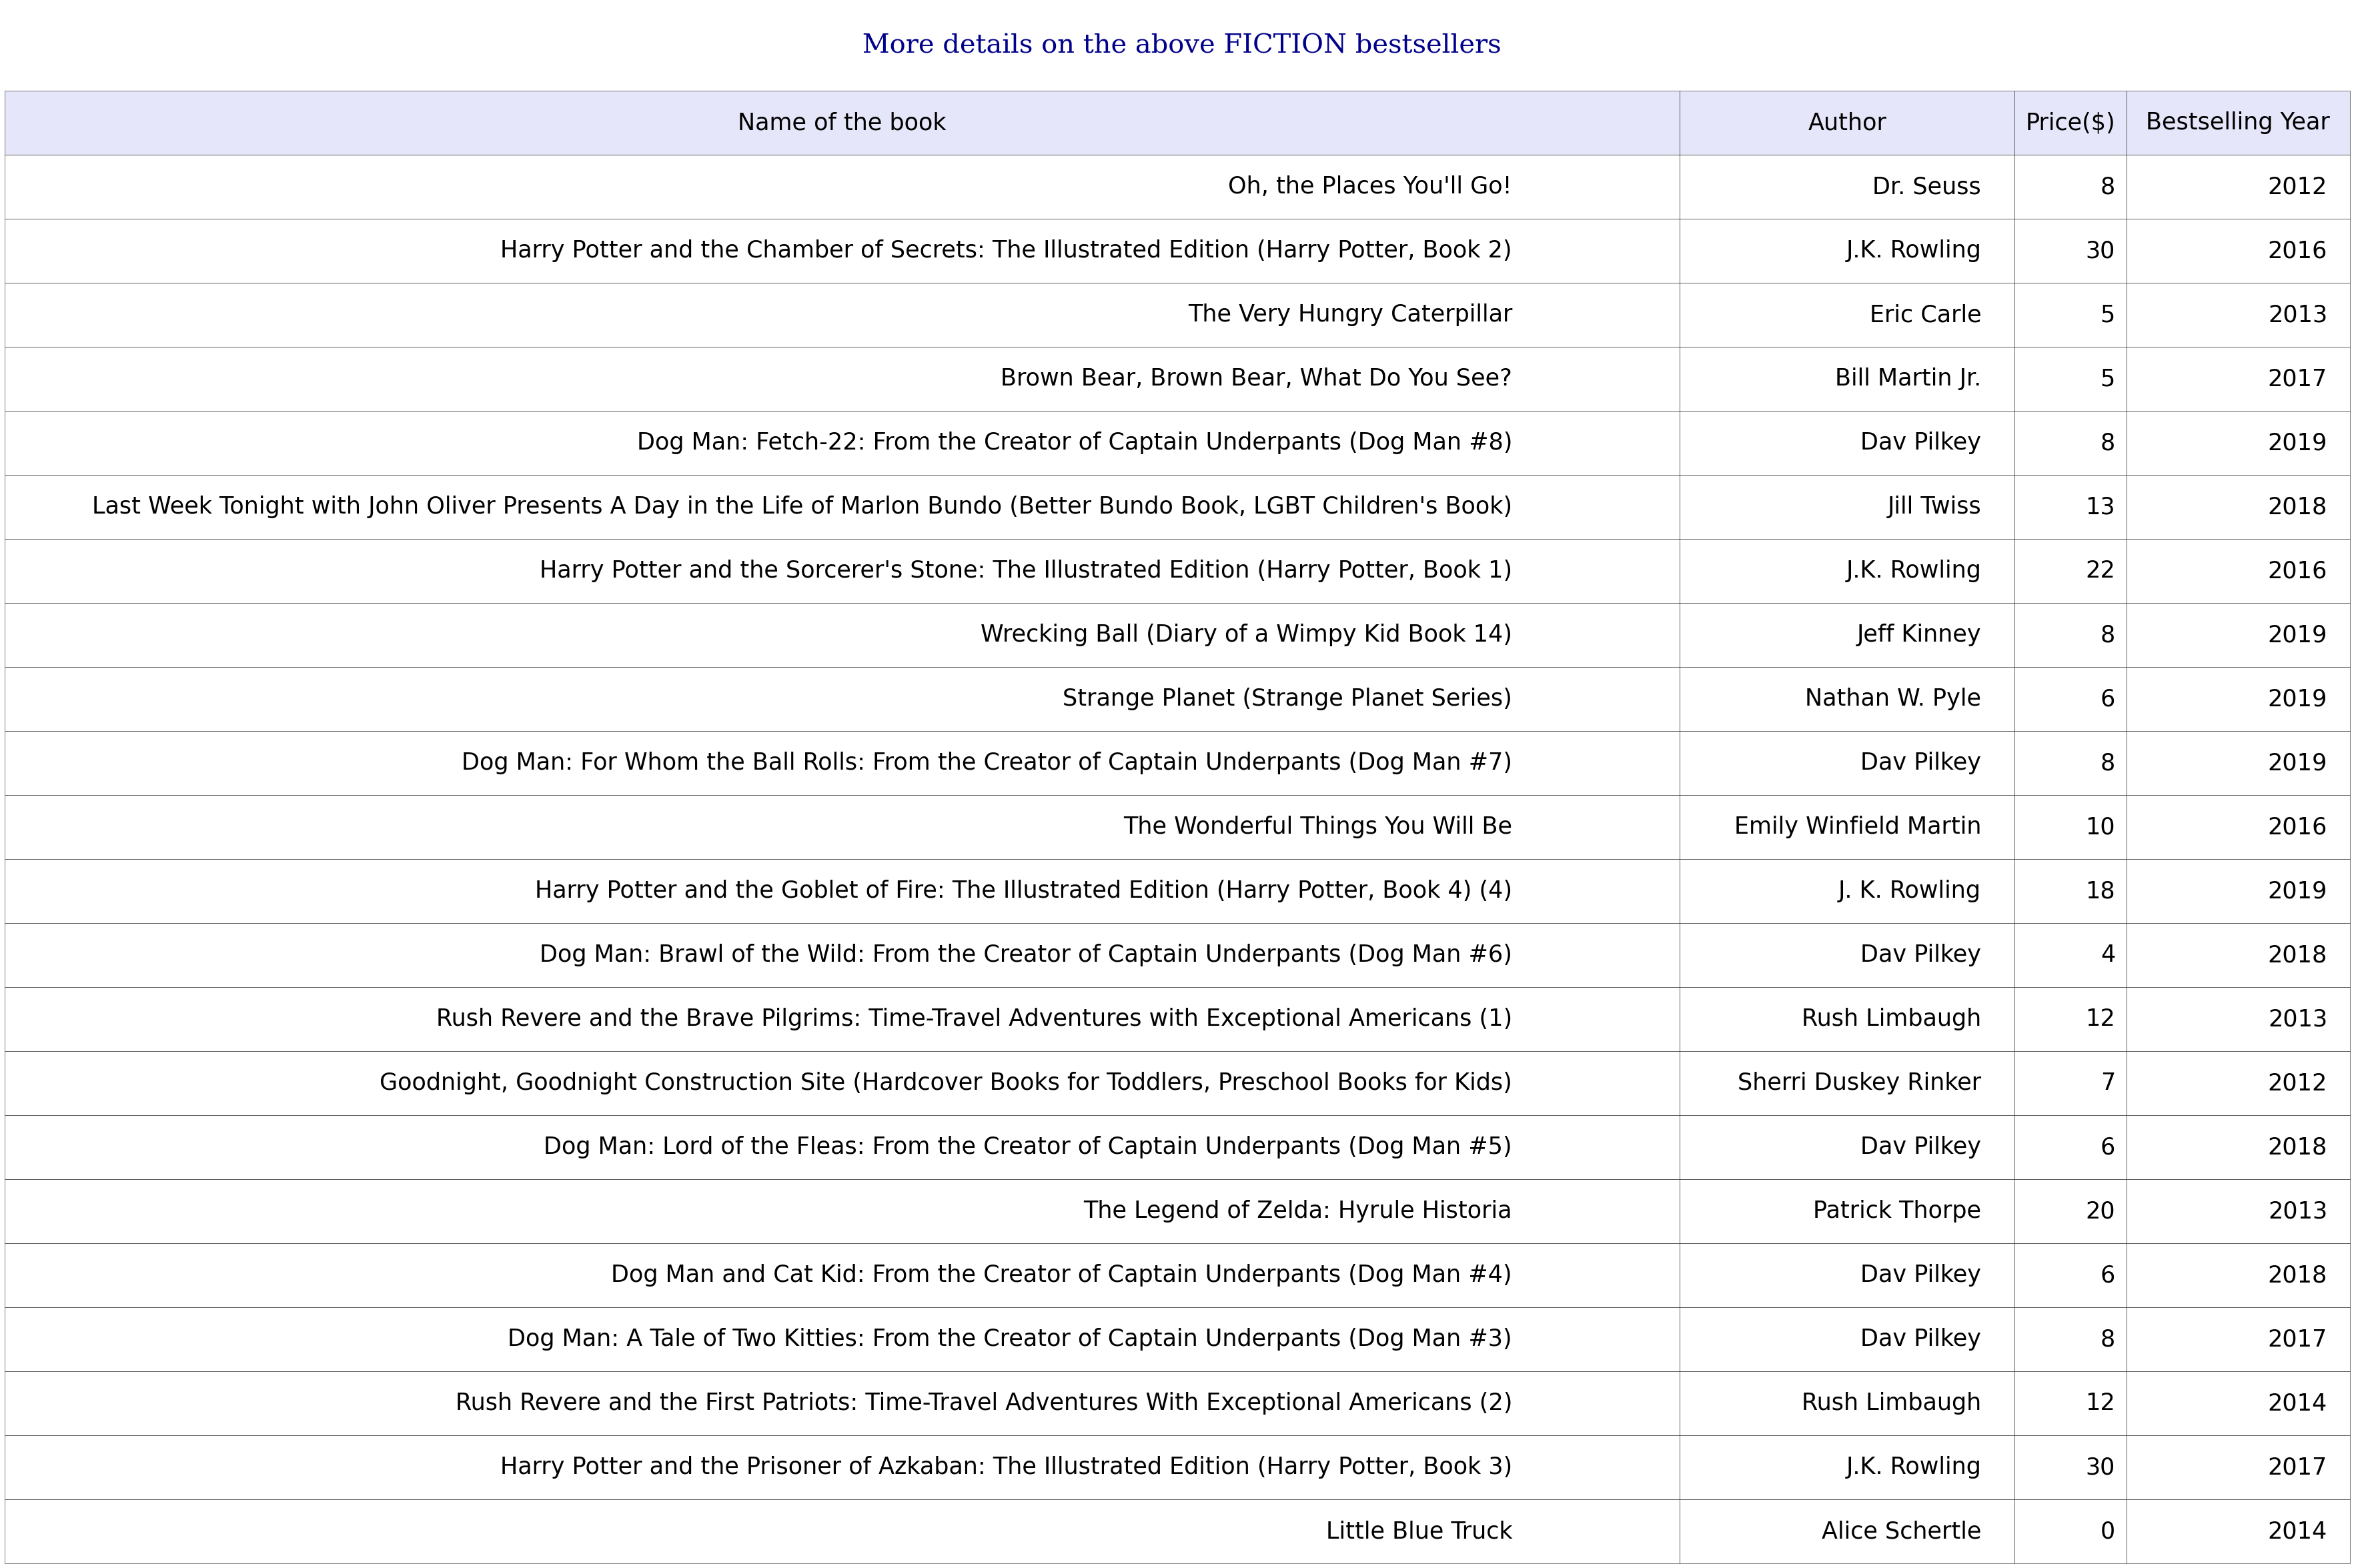

In [13]:
fig2 = plt.figure(figsize=(20,25))

plt.axis('tight')
plt.axis('off')

table1 = plt.table(cellText=fic_table, colLabels=['Name of the book', 'Author', 'Price($)', 'Bestselling Year'], 
                 colColours = ['lavender'] * 4, colWidths = [0.75, 0.15, 0.05, 0.1], loc='center')

plt.title('\n More details on the above FICTION bestsellers', fontdict=font1, y=1.35)

table1.auto_set_font_size(False)
table1.set_fontsize(35)
table1.scale(3,8)

plt.show()

## NON FICTION GENRE
###### Repeat all of the above steps

In [14]:
cur.execute('''
            select book_name, max(reviews)
            from amazonbooks
            where genre = 'Non Fiction' and user_rating = (select max(user_rating)
                              from amazonbooks)
            group by book_name, author, price_in_$, year
            order by 
            max(reviews) desc
            ''')

In [15]:
nonfic_bar = cur.fetchall()

In [16]:
Name2 = []
Review2 = []

for i in nonfic_bar:
    Name2.append(i[0])
    Review2.append(i[1])
       
Name2.reverse()
Review2.reverse()

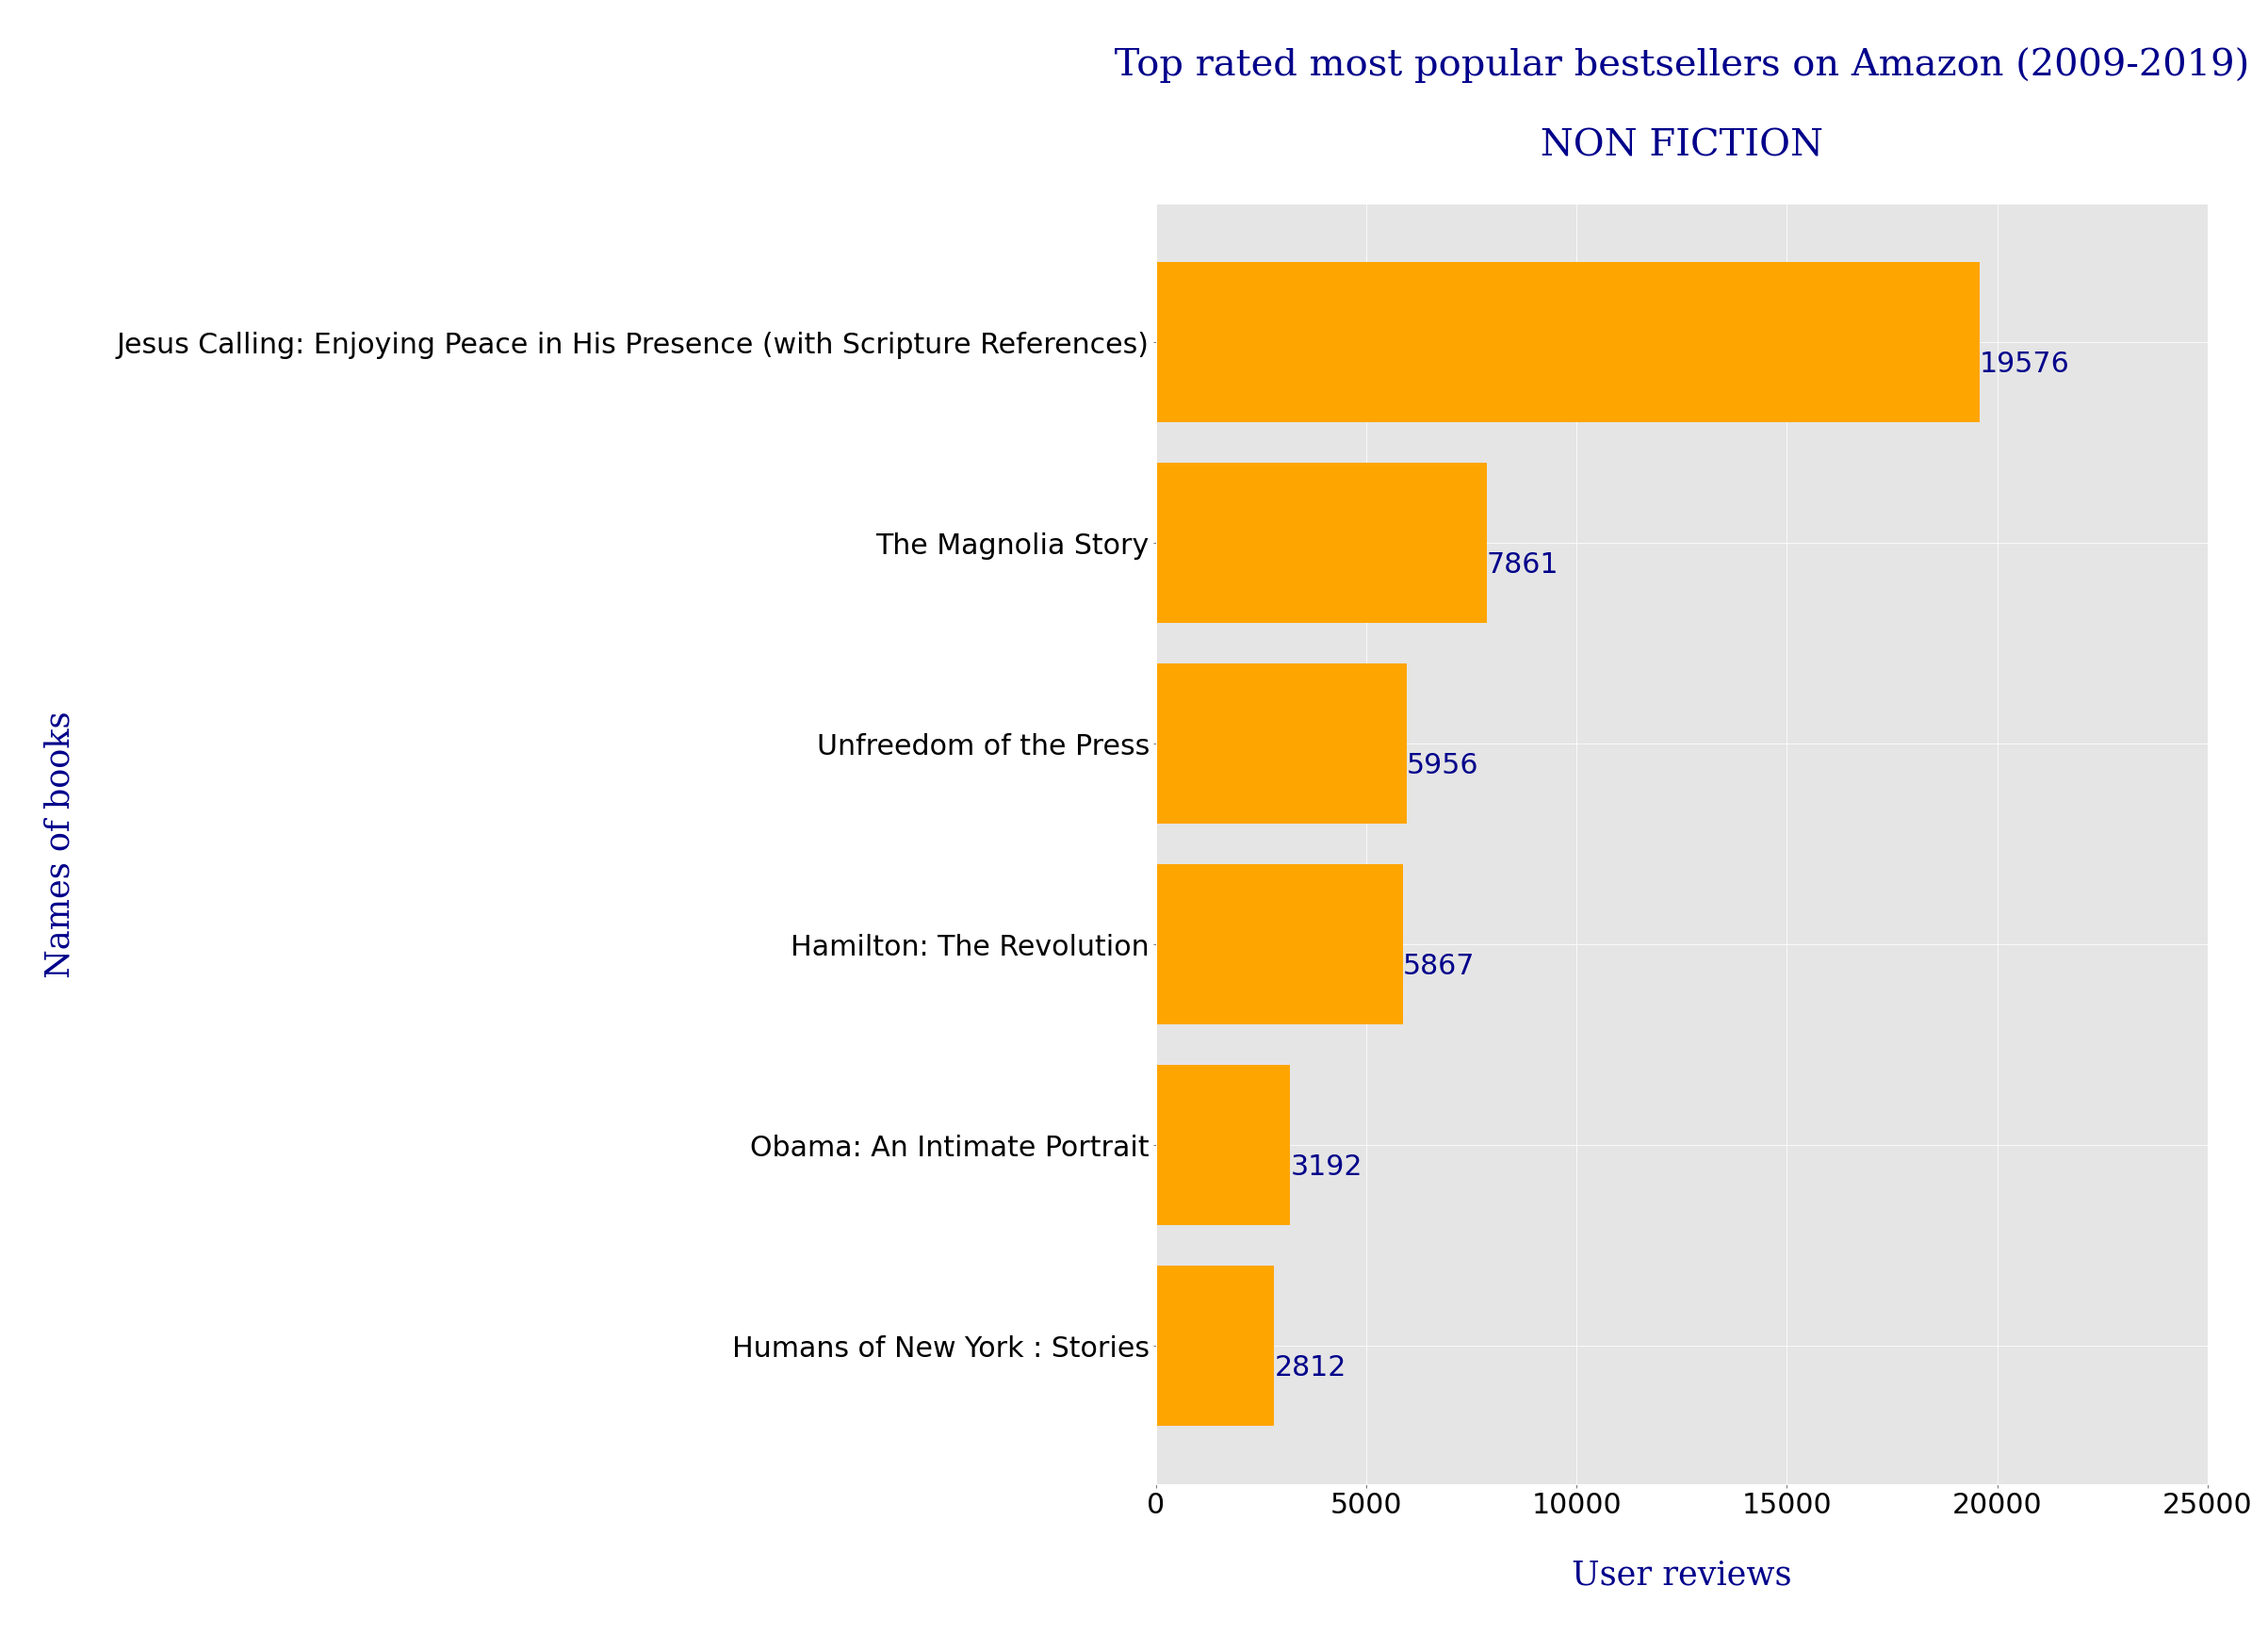

In [17]:
fig3 = plt.figure(figsize=(20,25))
plt.style.use('ggplot')

plt.barh(Name2, Review2, color='orange')
plt.xlim(0,25000)
plt.ylabel('\n Names of books \n', fontdict=font2)
plt.xlabel('\n User reviews \n', fontdict=font2)
plt.title('\n Top rated most popular bestsellers on Amazon (2009-2019) \n\n NON FICTION \n', fontdict=font1)

plt.xticks(fontsize=30, color='black')
plt.yticks(fontsize=30, color='black')

#Show bar values
for i, v in enumerate(Review2):
    plt.text(v, i-0.15, str(v), color='darkblue', fontsize=30)

plt.show()

In [18]:
cur.execute('''
select book_name, author, price_in_$, year from
(select book_name, author, price_in_$, year, max(reviews)
from amazonbooks
where genre = 'Non Fiction' and user_rating = (select max(user_rating)
                              from amazonbooks)
group by book_name, author, price_in_$, year
order by 
max(reviews) desc) as nonfic_table
''')

In [19]:
nonfic_table = cur.fetchall()

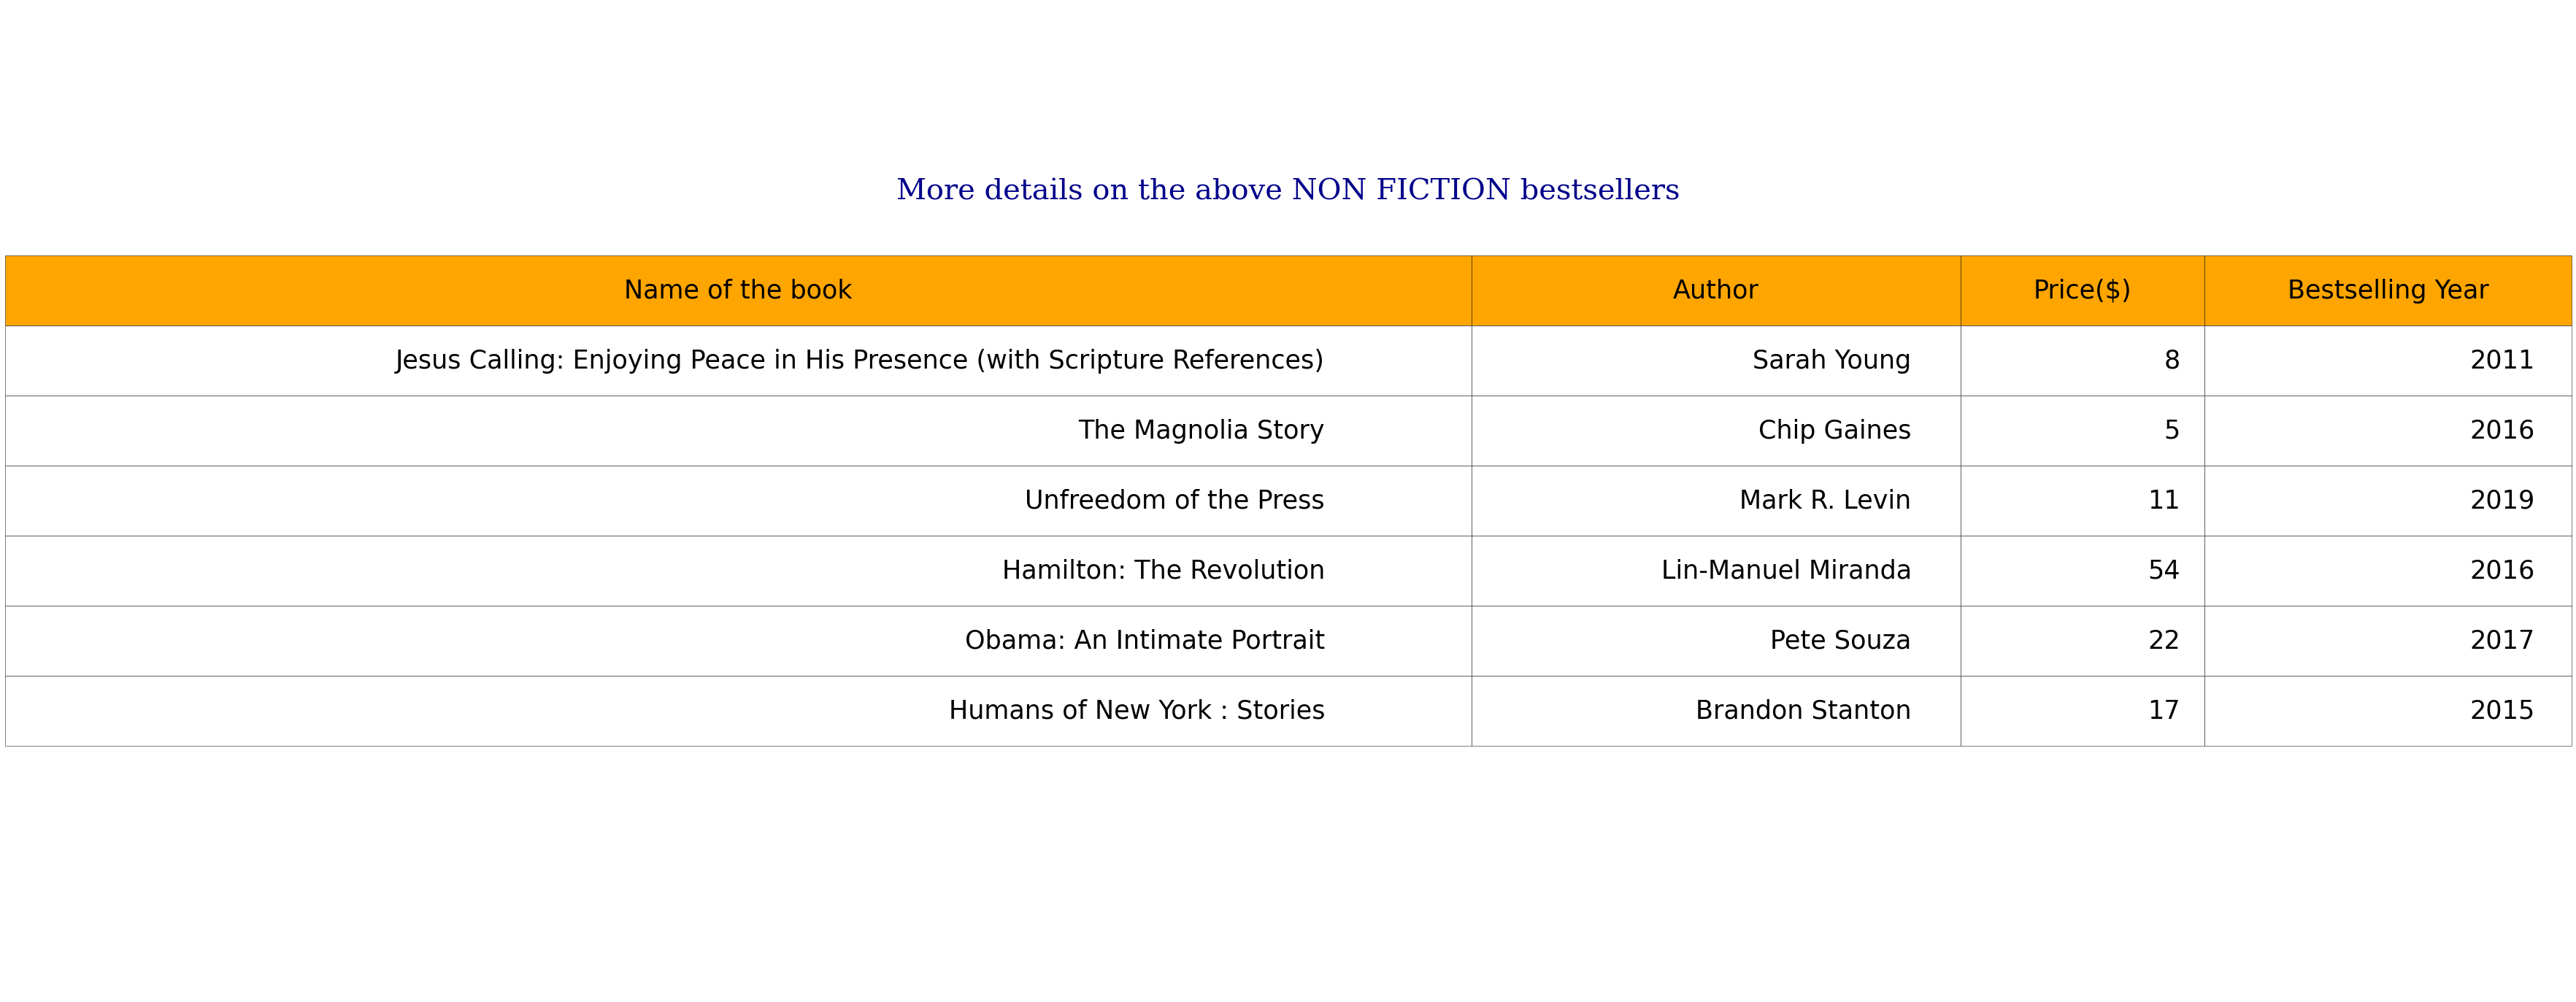

In [24]:
fig4 = plt.figure(figsize=(20,25))

plt.axis('tight')
plt.axis('off')

table2 = plt.table(cellText=nonfic_table, colLabels=['Name of the book', 'Author', 'Price($)', 'Bestselling Year'], 
                 colColours = ['orange'] * 4, colWidths = [0.6, 0.2, 0.1, 0.15], loc='center')

plt.title('More details on the above NON FICTION bestsellers', fontdict=font1, y=0.8)

table2.auto_set_font_size(False)
table2.set_fontsize(35)
table2.scale(3,8)

plt.show()

###### Save all the above figures in a single pdf file

In [25]:
figs = [fig1, fig2, fig3, fig4]

with PdfPages('AmazonBooks_OnlineBookstoreAnalysis_Results.pdf') as pdf:
    for fig in figs:
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()